# Convergence of Newton's method

We again look at finding a solution of $xe^x=2$ near $x=1$. To apply Newton's method, we need to calculate values of both the residual function $f$ and its derivative.

In [1]:
using FundamentalsNumericalComputation

In [2]:
f = x -> x*exp(x) - 2;
dfdx = x -> exp(x)*(x+1);

We don't know the exact root, so we use `nlsolve` to determine the "true" value.

In [3]:
r = nlsolve(x -> f(x[1]),[1.]).zero

1-element Vector{Float64}:
 0.852605502013726

We use $x_1=1$ as a starting guess and apply the iteration in a loop, storing the sequence of iterates in a vector.

In [4]:
x = [1;zeros(6)]
for k = 1:6
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])
end
x

7-element Vector{Float64}:
 1.0
 0.8678794411714423
 0.8527833734164099
 0.8526055263689221
 0.852605502013726
 0.8526055020137254
 0.8526055020137254

Here is the sequence of errors.

In [5]:
err = @. x - r

7-element Vector{Float64}:
  0.14739449798627402
  0.015273939157716354
  0.00017787140268388235
  2.435519608212644e-8
  0.0
 -5.551115123125783e-16
 -5.551115123125783e-16

Glancing at the exponents of the errors, they roughly form a neat doubling sequence until the error is comparable to machine precision. We can see this more precisely by taking logs.

In [6]:
logerr = @. log(abs(err))

7-element Vector{Float64}:
  -1.9146426270180517
  -4.181607225912883
  -8.63444972560201
 -17.530520618719432
 -Inf
 -35.127362657243
 -35.127362657243

Quadratic convergence isn't as graphically distinctive as linear convergence.

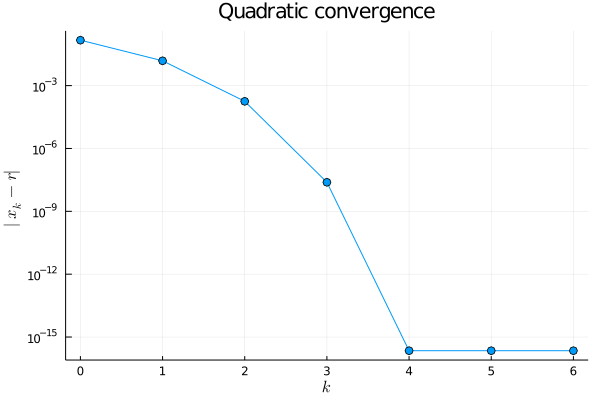

In [8]:
err = @. abs(max(err,eps()))  # prevent zero values
plot(0:6,err,m=:o,legend=:none,
    xlabel="\$k\$", yaxis=(:log10,"\$|x_k-r|\$"), title="Quadratic convergence")

This looks faster than linear convergence, but it's not easy to say more. If we could use infinite precision, the curve would continue to steepen forever.